#Chargement et Prétraitement des Données

In [ ]:
import pandas as pd

# Load the data from the three Excel files
d1 = pd.read_excel("/content/D1.xlsx")
d2 = pd.read_excel("/content/D2.xlsx")
d3 = pd.read_excel("/content/D3.xlsx")

# Display the converted dataframes to ensure the conversion and loading process is correct
d1.head()

# Renommez les colonnes
d1.columns = ['P1', 'P2', 'P3']
d2.columns = ['P1', 'P2', 'P3']
d3.columns = ['P1', 'P2', 'P3']

# Supprimez la première ligne de chaque DataFrame si elle contient des entêtes
d1 = d1.drop(index=0)
d2 = d2.drop(index=0)
d3 = d3.drop(index=0)

# Convertissez les données en numérique si nécessaire
d1 = d1.astype(float)
d2 = d2.astype(float)
d3 = d3.astype(float)

d1.head()


,P1,P2,P3
1,31.414286,62.414286,106.428571
2,64.381429,95.381429,121.428571
3,40.050000,71.050000,111.428571
4,44.775714,75.775714,79.285714
5,52.944286,83.944286,140.000000


# TSNE

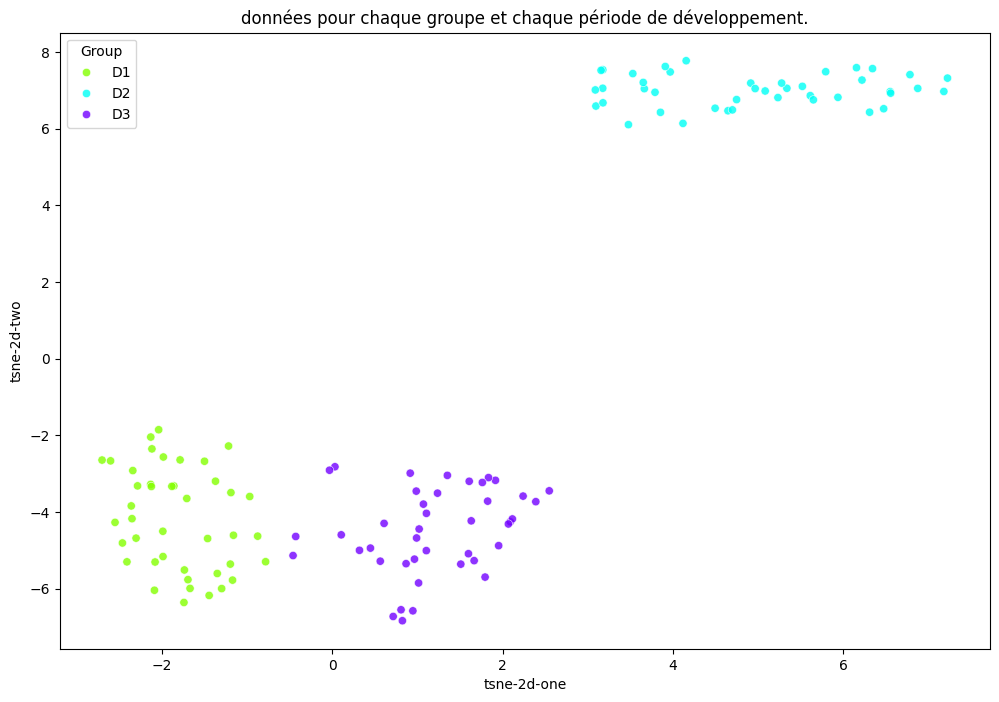

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Modifier la fonction pour retourner les résultats t-SNE
def generate_tsne_results(df, group_name):
    # Normalisation des données
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(df[['P1', 'P2', 'P3']])

    # Application de t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data_normalized)

    # Créer un DataFrame pour les résultats t-SNE
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])
    tsne_df['Group'] = group_name  # Utiliser le nom du groupe comme légende

    return tsne_df

# Générer les résultats t-SNE pour chaque groupe
tsne_d1 = generate_tsne_results(d1, 'D1')
tsne_d2 = generate_tsne_results(d2, 'D2')
tsne_d3 = generate_tsne_results(d3, 'D3')

# Combiner les résultats t-SNE dans un seul DataFrame
tsne_combined = pd.concat([tsne_d1, tsne_d2, tsne_d3])

# Visualisation combinée
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Group',
    palette=sns.color_palette("hsv", 3),
    data=tsne_combined,
    legend="full",
    alpha=0.8
)
plt.title('données pour chaque groupe et chaque période de développement.')
plt.show()


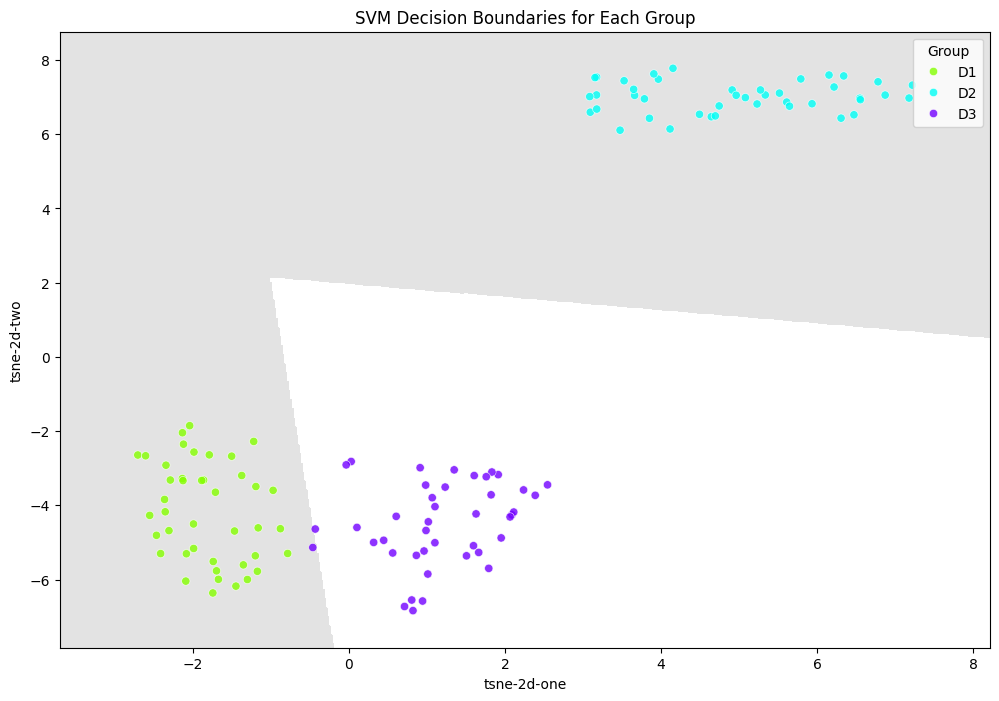

In [ ]:
import numpy as np
from sklearn.svm import SVC

# Fonction pour entraîner un modèle SVM et retourner les frontières de décision
def generate_svm_boundaries(df):
    # Préparer les données d'entrainement
    X = df[['tsne-2d-one', 'tsne-2d-two']].values
    y = df['Group'].astype('category').cat.codes  # Convertir les étiquettes de groupe en codes numériques

    # Entraîner le modèle SVM
    svm = SVC(kernel='linear', C=1.0)
    svm.fit(X, y)

    # Créer une grille pour évaluer le modèle
    h = .02  # pas de la grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prédire les étiquettes pour chaque point de la grille
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    return xx, yy, Z

# Utiliser la fonction pour obtenir les frontières de décision
xx, yy, Z = generate_svm_boundaries(tsne_combined)

# Visualiser les résultats
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.8, levels=np.unique(y), cmap=plt.cm.coolwarm)
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Group',
    palette=sns.color_palette("hsv", 3),
    data=tsne_combined,
    legend="full",
    alpha=0.8
)
plt.title('SVM Decision Boundaries for Each Group')
plt.show()


##Prétraitement et Visualisation des Données avec t-SNE

In [ ]:
import pandas as pd

data = pd.read_excel('/content/Gains.xlsx')
data.head()

data_2 = data[['Période1  0-14 jours','Unnamed: 1','Unnamed: 2','Période 2 14-28 jours','Unnamed: 5','Unnamed: 6','Période 3 28-42 jours','Unnamed: 9','Unnamed: 10']]

data_2 = data_2.iloc[0:43,:]

data_2.columns = ['D1_P1','D1_P2','D1,P3','D2_P1','D2_P2','D2,P3','D3_P1','D3_P2','D3,P3']

data_d1 = data_2[['D1_P1','D1_P2','D1,P3']]
data_d2 = data_2[['D2_P1','D2_P2','D2,P3']]
data_d3 = data_2[['D3_P1','D3_P2','D3,P3']]

data_d1 = data_d1.drop([0])
data_d2 = data_d2.drop([0])
data_d3 = data_d3.drop([0])

data_d1["group"] = 1
data_d2["group"] = 2
data_d3["group"] = 3

data_d1.head()

data_d1.columns = ['P1','P2','P3','group']
data_d2.columns = ['P1','P2','P3','group']
data_d3.columns = ['P1','P2','P3','group']

data_final = pd.concat([data_d1,data_d2,data_d3],axis=0)
data_schuffle = data_final.sample(frac=1).reset_index(drop=True)
data_schuffle.head()

,P1,P2,P3,group
0,49.028571,19.774286,72.631429,1
1,107.625714,69.017143,57.527143,2
2,75.775714,104.277143,73.438571,2
3,100.158571,71.541429,79.314286,2
4,66.441429,101.532857,79.024286,2


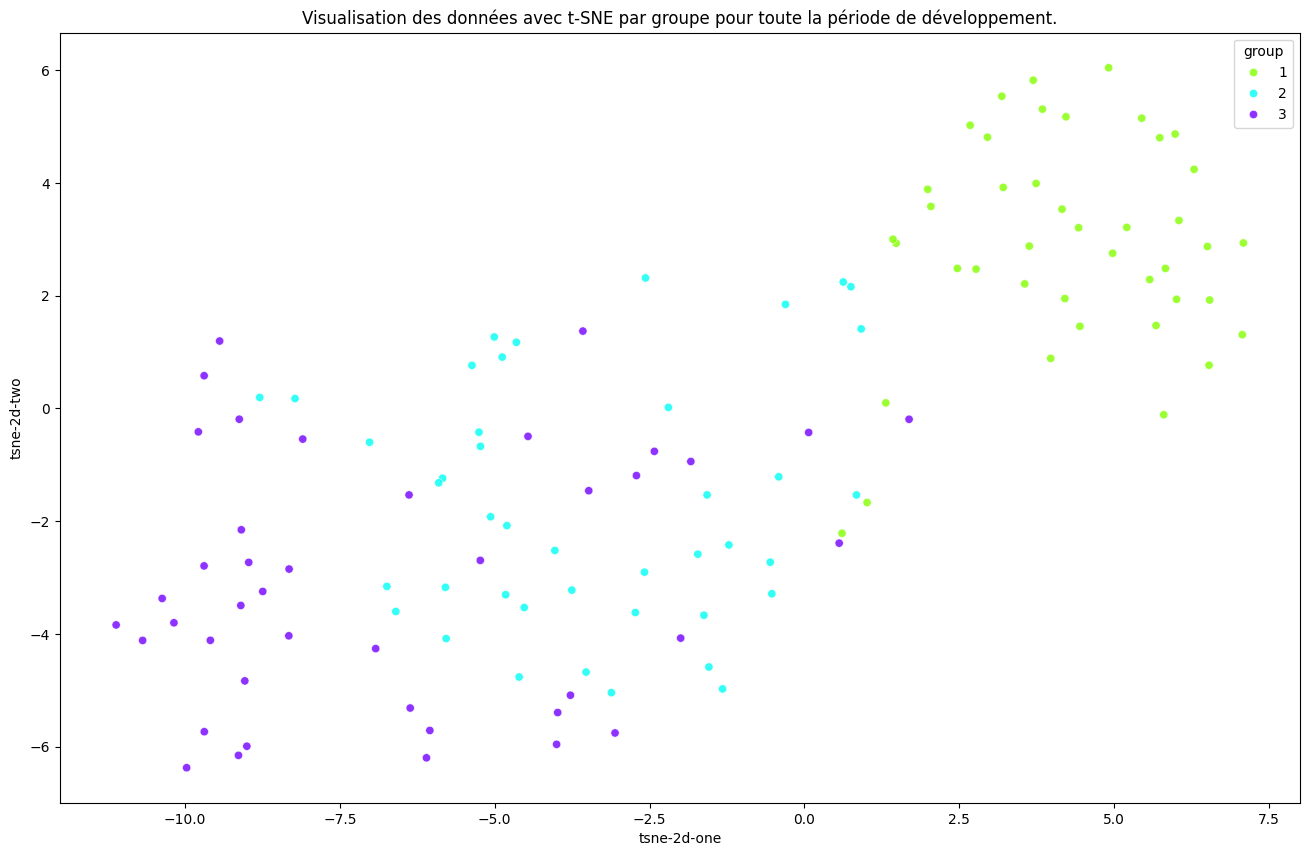

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que `data_schuffle` est votre DataFrame après le prétraitement
# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_schuffle[['P1', 'P2', 'P3']])

# Application de t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_normalized)

# Ajout des résultats t-SNE au DataFrame
data_schuffle['tsne-2d-one'] = tsne_results[:,0]
data_schuffle['tsne-2d-two'] = tsne_results[:,1]

# Visualisation
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="group",
    palette=sns.color_palette("hsv", 3),
    data=data_schuffle,
    legend="full",
    alpha=0.8
)
plt.title('Visualisation des données avec t-SNE par groupe pour toute la période de développement.')
plt.show()


#MDS

##Réduction de Dimension et Visualisation avec MDS

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


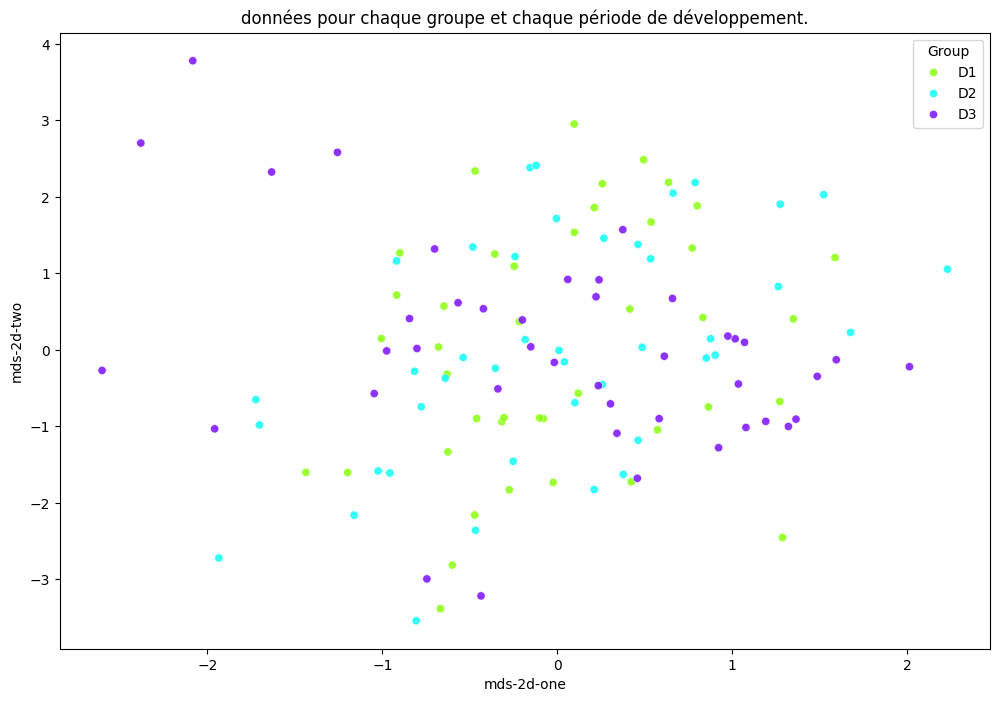

In [ ]:
from sklearn.manifold import MDS
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que d1, d2, d3 sont vos DataFrames préparés

def generate_mds_results(df, group_name):
    # Normalisation des données
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(df[['P1', 'P2', 'P3']])

    # Application de MDS
    mds = MDS(n_components=2, random_state=42)
    mds_results = mds.fit_transform(data_normalized)

    # Créer un DataFrame pour les résultats MDS
    mds_df = pd.DataFrame(data=mds_results, columns=['mds-2d-one', 'mds-2d-two'])
    mds_df['Group'] = group_name  # Utiliser le nom du groupe comme légende

    return mds_df

# Générer les résultats MDS pour chaque groupe
mds_d1 = generate_mds_results(d1, 'D1')
mds_d2 = generate_mds_results(d2, 'D2')
mds_d3 = generate_mds_results(d3, 'D3')

# Combiner les résultats MDS dans un seul DataFrame
mds_combined = pd.concat([mds_d1, mds_d2, mds_d3])

# Visualisation combinée
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='mds-2d-one', y='mds-2d-two',
    hue='Group',
    palette=sns.color_palette("hsv", 3),
    data=mds_combined,
    legend="full",
    alpha=0.8
)
plt.title('données pour chaque groupe et chaque période de développement.')
plt.show()


##réduction de Dimension avec MDS et Visualisation Globale

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


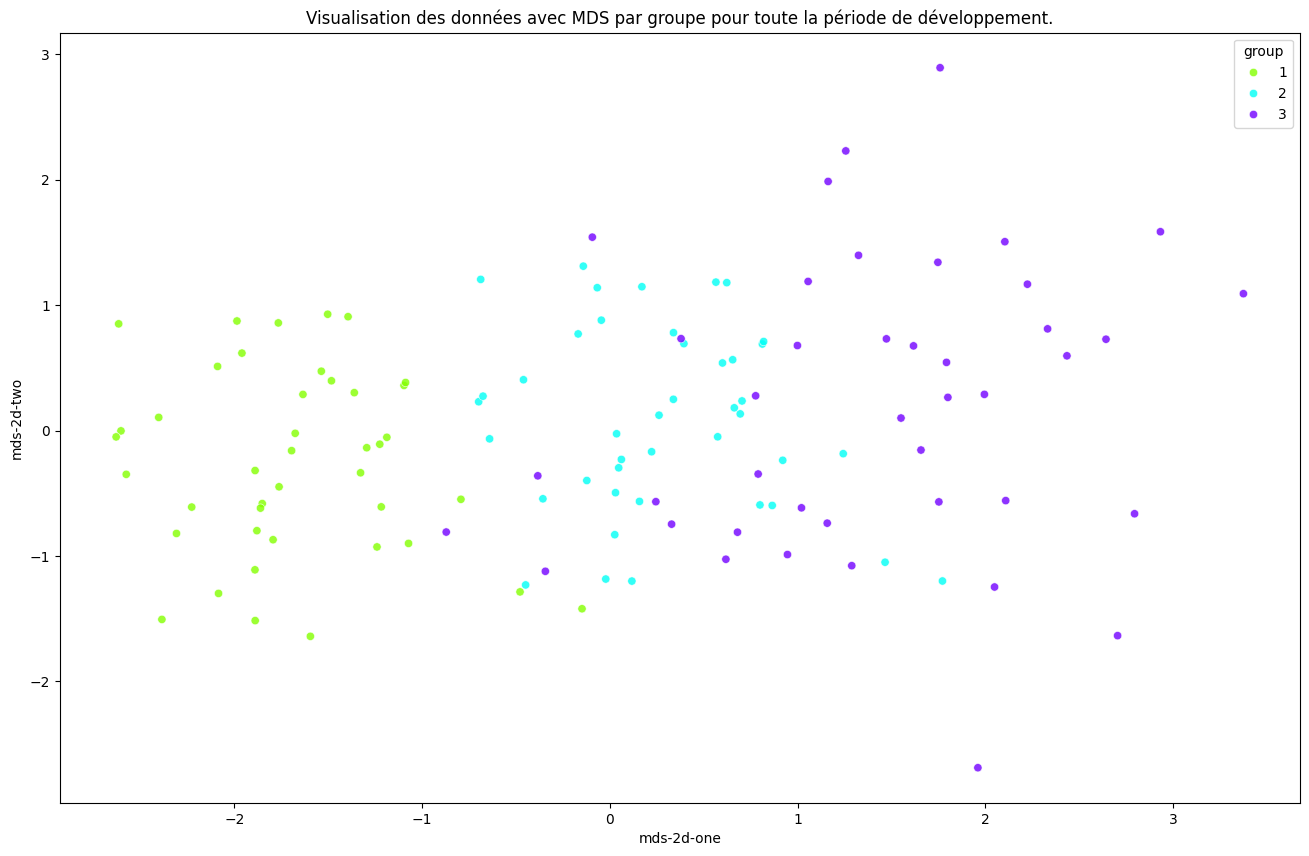

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_schuffle[['P1', 'P2', 'P3']])

# Application de MDS
mds = MDS(n_components=2, random_state=42)
mds_results = mds.fit_transform(data_normalized)

# Ajout des résultats MDS au DataFrame
data_schuffle['mds-2d-one'] = mds_results[:, 0]
data_schuffle['mds-2d-two'] = mds_results[:, 1]

# Visualisation
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="mds-2d-one", y="mds-2d-two",
    hue="group",
    palette=sns.color_palette("hsv", 3),
    data=data_schuffle,
    legend="full",
    alpha=0.8
)
plt.title('Visualisation des données avec MDS par groupe pour toute la période de développement.')
plt.show()


#LDA

##Analyse Discriminante Linéaire (LDA) et Visualisation

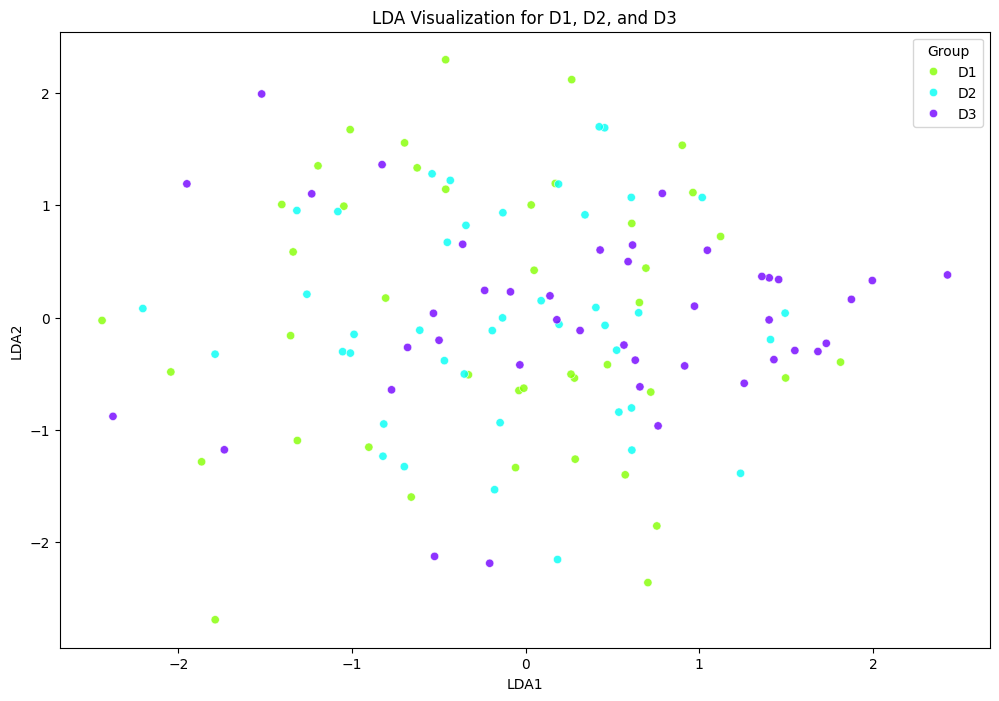

In [ ]:
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  from sklearn.preprocessing import StandardScaler
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  # Préparation des données en ajoutant une colonne 'group' à chaque DataFrame
  d1['group'] = 'D1'
  d2['group'] = 'D2'
  d3['group'] = 'D3'

  # Concaténation des DataFrames
  data_combined = pd.concat([d1, d2, d3])

  # Normalisation des caractéristiques
  scaler = StandardScaler()
  features_normalized = scaler.fit_transform(data_combined[['P1', 'P2', 'P3']])

  # Application de LDA
  lda = LDA(n_components=2)  # On se limite à 2 dimensions pour la visualisation
  X_lda = lda.fit_transform(features_normalized, data_combined['group'])

  # Création d'un DataFrame pour les résultats LDA
  lda_df = pd.DataFrame(data=X_lda, columns=['LDA1', 'LDA2'])
  lda_df['Group'] = data_combined['group'].values

  # Visualisation
  plt.figure(figsize=(12, 8))
  sns.scatterplot(
      x='LDA1', y='LDA2',
      hue='Group',
      palette=sns.color_palette("hsv", 3),
      data=lda_df,
      legend="full",
      alpha=0.8
  )
  plt.title('LDA Visualization for D1, D2, and D3')
  plt.show()


##Réduction de Dimension avec LDA et Visualisation des Groupes

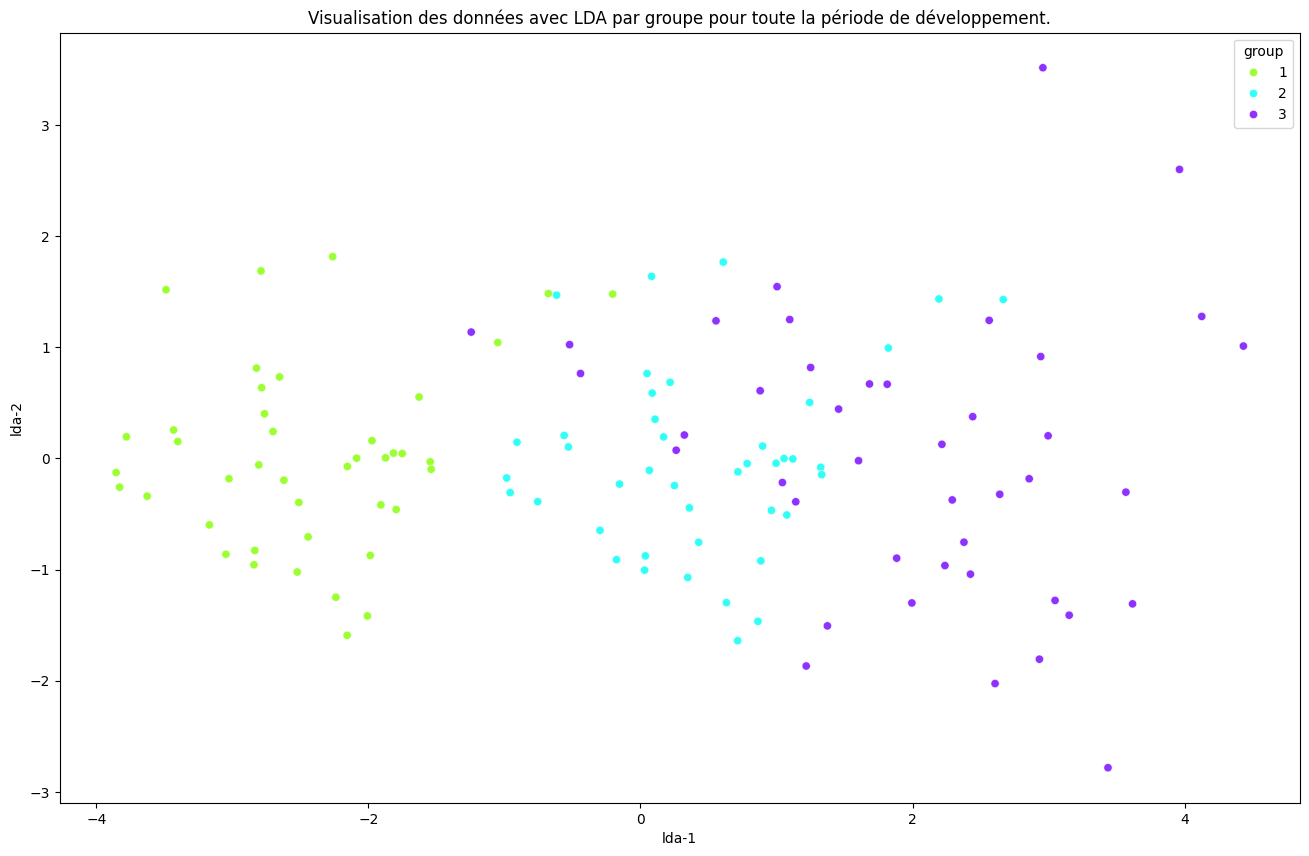

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_schuffle[['P1', 'P2', 'P3']])

# Les étiquettes de classe (groupes) doivent être fournies pour LDA
y = data_schuffle['group']

# Application de LDA
lda = LDA(n_components=2)
lda_results = lda.fit_transform(data_normalized, y)

# Ajout des résultats LDA au DataFrame
data_schuffle['lda-1'] = lda_results[:, 0]
data_schuffle['lda-2'] = lda_results[:, 1]

# Visualisation
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="lda-1", y="lda-2",
    hue="group",
    palette=sns.color_palette("hsv", 3),
    data=data_schuffle,
    legend="full",
    alpha=0.8
)
plt.title('Visualisation des données avec LDA par groupe pour toute la période de développement.')
plt.show()


In [ ]:
import pandas as pd

# Load the data from the three Excel files
d1 = pd.read_excel("/content/D1.xlsx")
d2 = pd.read_excel("/content/D2.xlsx")
d3 = pd.read_excel("/content/D3.xlsx")

# Display the converted dataframes to ensure the conversion and loading process is correct
d1.head()
# Supposer que `d1`, `d2`, `d3` sont vos DataFrames originaux pour les groupes D1, D2, D3 respectivement

# Renommez les colonnes
d1.columns = ['P1', 'P2', 'P3']
d2.columns = ['P1', 'P2', 'P3']
d3.columns = ['P1', 'P2', 'P3']

# Supprimez la première ligne de chaque DataFrame si elle contient des entêtes
d1 = d1.drop(index=0)
d2 = d2.drop(index=0)
d3 = d3.drop(index=0)

# Convertissez les données en numérique si nécessaire
d1 = d1.astype(float)
d2 = d2.astype(float)
d3 = d3.astype(float)

d1.head()


,P1,P2,P3
1,31.414286,62.414286,106.428571
2,64.381429,95.381429,121.428571
3,40.050000,71.050000,111.428571
4,44.775714,75.775714,79.285714
5,52.944286,83.944286,140.000000


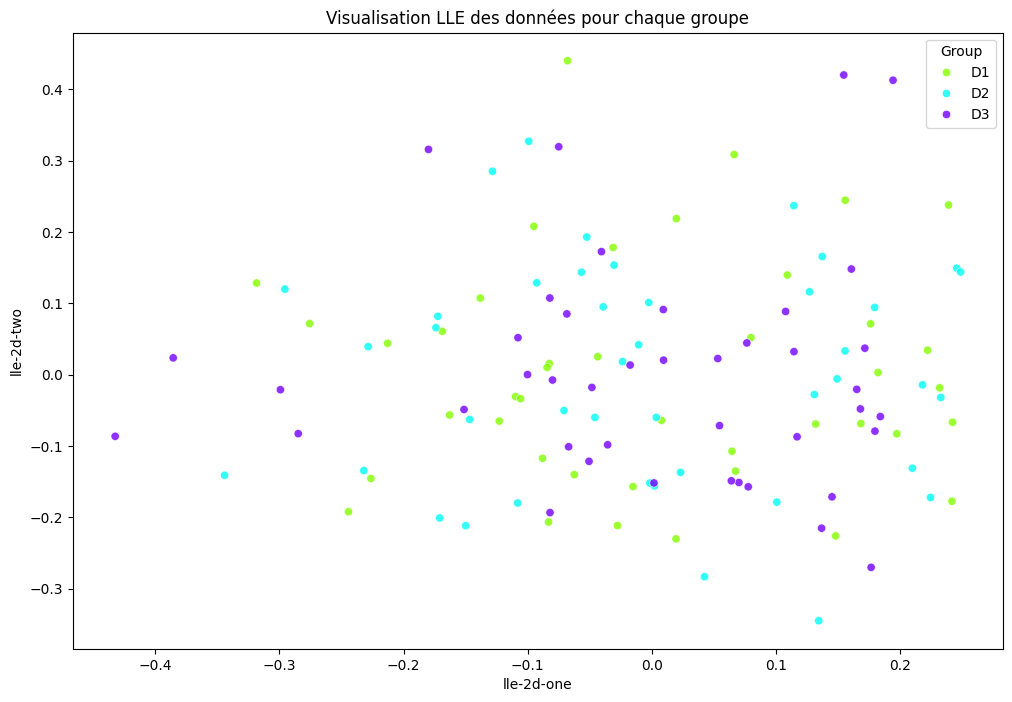

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import seaborn as sns

# Modifier la fonction pour retourner les résultats LLE
def generate_lle_results(df, group_name, n_neighbors=5, n_components=2):
    # Normalisation des données
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(df[['P1', 'P2', 'P3']])

    # Application de LLE
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
    lle_results = lle.fit_transform(data_normalized)

    # Créer un DataFrame pour les résultats LLE
    lle_df = pd.DataFrame(data=lle_results, columns=['lle-2d-one', 'lle-2d-two'])
    lle_df['Group'] = group_name  # Utiliser le nom du groupe comme légende

    return lle_df

# Supposons que vous ayez déjà les DataFrames d1, d2, d3 prêts à être utilisés.
# Générer les résultats LLE pour chaque groupe
lle_d1 = generate_lle_results(d1, 'D1')
lle_d2 = generate_lle_results(d2, 'D2')
lle_d3 = generate_lle_results(d3, 'D3')

# Combiner les résultats LLE dans un seul DataFrame
lle_combined = pd.concat([lle_d1, lle_d2, lle_d3])

# Visualisation combinée
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='lle-2d-one', y='lle-2d-two',
    hue='Group',
    palette=sns.color_palette("hsv", 3),
    data=lle_combined,
    legend="full",
    alpha=0.8
)
plt.title('Visualisation LLE des données pour chaque groupe')
plt.show()


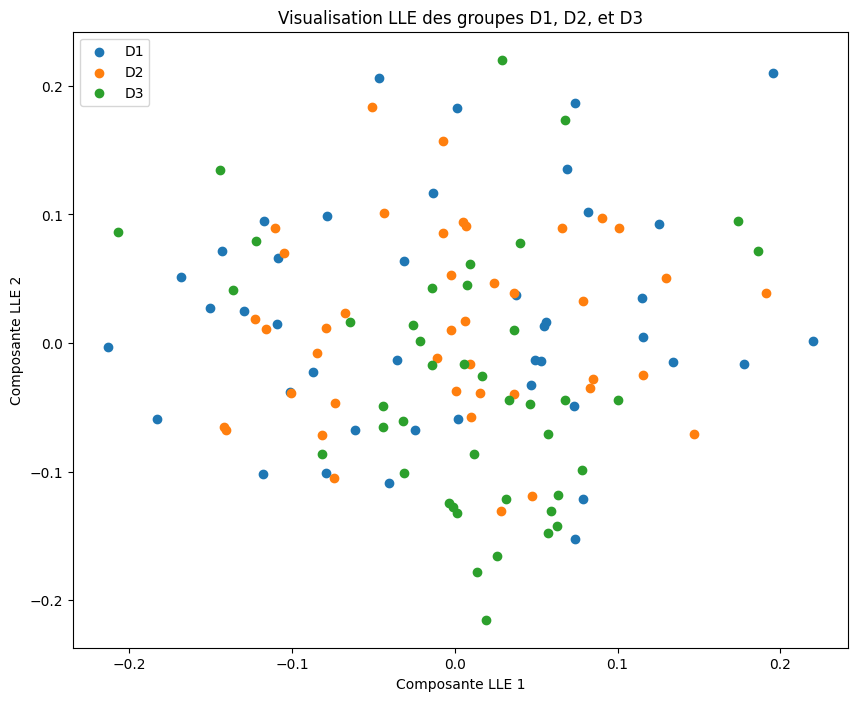

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
import numpy as np
import matplotlib.pyplot as plt

# Concaténer les données des trois groupes en un seul DataFrame
all_data = pd.concat([d1, d2, d3], keys=['D1', 'D2', 'D3']).reset_index(level=1, drop=True).reset_index()

# Préparation des données pour LLE
X = all_data.drop('index', axis=1)  # Supprimer la colonne 'index' qui contient les noms des groupes

# Application de LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=0)
X_transformed = lle.fit_transform(X)

# Ajouter les composantes LLE au DataFrame
all_data['LLE1'] = X_transformed[:, 0]
all_data['LLE2'] = X_transformed[:, 1]

# Visualisation des données par groupe après LLE
plt.figure(figsize=(10, 8))
for group in ['D1', 'D2', 'D3']:
    subset = all_data[all_data['index'] == group]
    plt.scatter(subset['LLE1'], subset['LLE2'], label=group)
plt.title('Visualisation LLE des groupes D1, D2, et D3')
plt.xlabel('Composante LLE 1')
plt.ylabel('Composante LLE 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


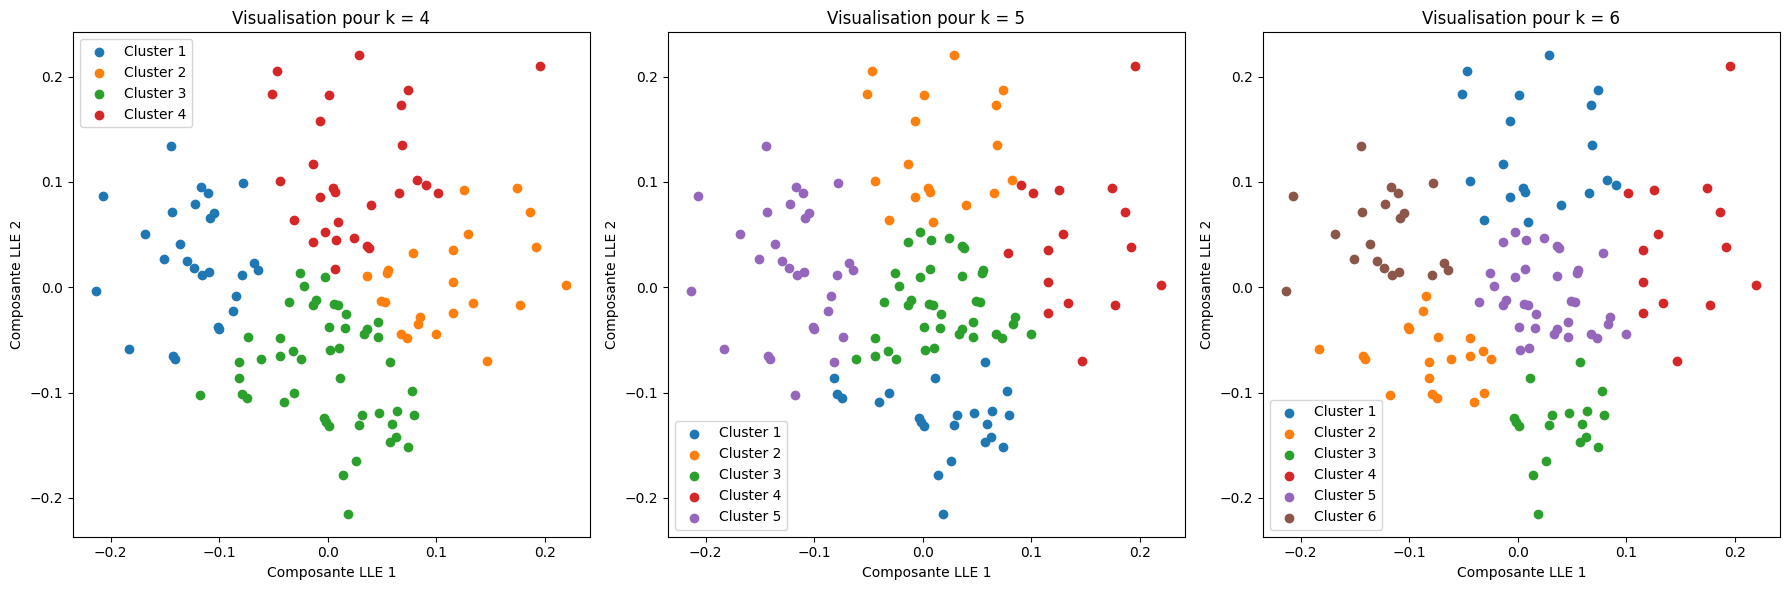

In [ ]:
from sklearn.cluster import KMeans

# Initialisation d'une figure pour les visualisations
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

k_values = [4, 5, 6]

for i, k in enumerate(k_values):
    # Application de K-means pour chaque k
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)

    # Ajout des étiquettes de cluster au DataFrame
    all_data[f'Cluster_k{k}'] = kmeans.labels_

    # Visualisation pour chaque k
    for cluster in range(k):
        subset = all_data[all_data[f'Cluster_k{k}'] == cluster]
        axs[i].scatter(subset['LLE1'], subset['LLE2'], label=f'Cluster {cluster+1}')

    axs[i].set_title(f'Visualisation pour k = {k}')
    axs[i].set_xlabel('Composante LLE 1')
    axs[i].set_ylabel('Composante LLE 2')
    axs[i].legend()

plt.tight_layout()
plt.show()


# Entraînement et Évaluation d'un Modèle SVM pour la Classification des Groupes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Supposons que les labels soient les indices de groupe (D1, D2, D3) convertis en valeurs numériques : D1=0, D2=1, D3=2
# Combinons d'abord les données et leurs labels
combined_data = pd.concat([d1.assign(label=0), d2.assign(label=1), d3.assign(label=2)])

# Séparation des caractéristiques et des labels
X = combined_data[['P1', 'P2', 'P3']]  # Caractéristiques
y = combined_data['label']  # Labels

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle SVM avec un noyau linéaire
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_linear.predict(X_test)

# Évaluation de la performance
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.39473684210526316

##Classification avec SVM à Noyau RBF et Évaluation du Modèle

In [ ]:
from sklearn.svm import SVC

# Création du modèle SVM avec un noyau RBF
svm_rbf = SVC(kernel='rbf', gamma='auto', random_state=42)

# Entraînement du modèle sur les données d'entraînement
svm_rbf.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)


##Comparaison des Modèles SVM avec Noyaux RBF et Polynomial

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Supposons que all_data contienne les étiquettes correctes dans une colonne nommée 'Label'
# Pour cet exemple, je vais créer une colonne 'Label' fictive, car les données originales n'en ont pas.
# Cette étape doit être ajustée en fonction des vraies étiquettes de vos données.
np.random.seed(42)  # Pour la reproductibilité
all_data['Label'] = np.random.randint(0, 2, size=all_data.shape[0])

# Séparation des caractéristiques et des étiquettes
X = all_data[['LLE1', 'LLE2']]
y = all_data['Label']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement et évaluation avec noyau RBF
svm_rbf = SVC(kernel='rbf', gamma='auto', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Entraînement et évaluation avec noyau Polynomial
svm_poly = SVC(kernel='poly', degree=3, gamma='auto', random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

accuracy_rbf, accuracy_poly


(0.5789473684210527, 0.5789473684210527)

##Évaluation de la Séparabilité Linéaire avec SVM

In [ ]:
from sklearn.svm import SVC

# Définir un modèle SVM avec un noyau linéaire pour tester la séparabilité linéaire sur l'ensemble de la période de développement
svm_linear = SVC(kernel='linear', C=1.0, random_state=0)


In [ ]:
# Génération des étiquettes pour chaque groupe (D1, D2, D3) pour l'ensemble de la période de développement
# D1 -> 0, D2 -> 1, D3 -> 2
y_labels = all_data['index'].map({'D1': 0, 'D2': 1, 'D3': 2}).values

# Réessayer d'entraîner le modèle SVM linéaire et calculer sa précision
svm_linear.fit(X_transformed, y_labels)
linear_accuracy = svm_linear.score(X_transformed, y_labels)

linear_accuracy


0.42857142857142855

##Amélioration de la Classification avec SVM et Transformation RBF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Utilisation de la transformation avec noyau RBF pour améliorer la linéarité
X_train, X_test, y_train, y_test = train_test_split(X_transformed, all_data['index'], test_size=0.3, random_state=42)

# Entraînement d'un modèle SVM avec noyau RBF
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Calcul de l'exactitude sur l'ensemble de test
accuracy_rbf = svm_rbf.score(X_test, y_test)

# Affichage de l'exactitude
accuracy_rbf


0.5

##Classification avec SVM Non-Linéaire et Visualisation des Frontières de Décision

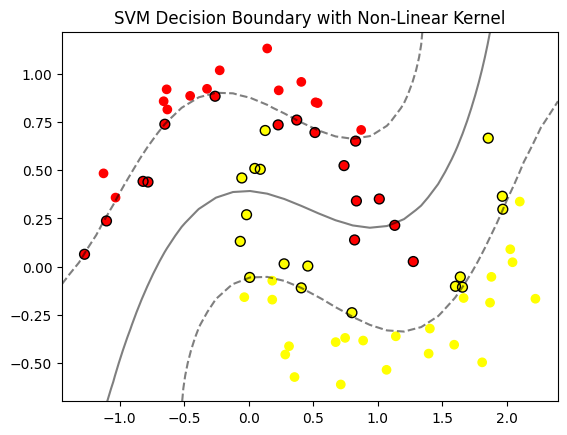

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM with non-linear kernel
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X_train, y_train)

# Predictions for the test set
y_pred = model.predict(X_test)

# Function to plot decision boundaries
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Creating grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plotting decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plotting support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plotting the data points and decision boundaries
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
plot_svc_decision_function(model)
plt.title("SVM Decision Boundary with Non-Linear Kernel")
plt.show()

# Displaying classification report
print(classification_report(y_test, y_pred))
